## Customer Analysis

#OVERVIEW

A well known company with numerous products needs to analyze their customer behavior and
classify them whether they will accept the campaigns held by the company. Also, cluster the
customers into different segments.
Create a model using : Train Dataset

#GOALS

The objective of this exercise is to build a model, using historical data Focus on all steps of data
science (EDA, data processing, model, evaluation, charts)
1. Highlight any trend in data, deep insight, novel steps that you take
2. Highlight next steps and improvements.
3. Apply classification and clustering machine learning algorithms and evaluate it using Test dataset.


# Data Dictionary

#People
● ID: Customer's unique identifier
● Year_Birth: Customer's birth year
● Education: Customer's education level
● Marital_Status: Customer's marital status
● Income: Customer's yearly household income
● Kidhome: Number of children in customer's household
● Teenhome: Number of teenagers in customer's household
● Dt_Customer: Date of customer's enrollment with the company
● Recency: Number of days since customer's last purchase
● Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#Products
● MntWines: Amount spent on wine in last 2 years
● MntFruits: Amount spent on fruits in last 2 years
● MntMeatProducts: Amount spent on meat in last 2 years
● MntFishProducts: Amount spent on fish in last 2 years
● MntSweetProducts: Amount spent on sweets in last 2 years
● MntGoldProds: Amount spent on gold in last 2 years

#Promotion
● NumDealsPurchases: Number of purchases made with a discount
● AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
● AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
● AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
● AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
● AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
● Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#Place
● NumWebPurchases: Number of purchases made through the company’s website
● NumCatalogPurchases: Number of purchases made using a catalogue
● NumStorePurchases: Number of purchases made directly in stores
● NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Set the style for matplotlib plots
plt.style.use('seaborn')
    
import warnings
warnings.filterwarnings("ignore")

## Train Data Loading and Overview 

In [2]:
# Data Loading and Overview 
df_train = pd.read_csv('customer_train.csv')

df_train.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df_train.tail()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,...,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,...,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,...,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,...,7,0,0,0,0,0,0,3,11,0
1679,1679,1679,8230,1980,S1,Menikah,33228000.0,1,0,23-01-2014,...,7,0,0,0,0,0,0,3,11,0


## Exploratory Data Analysis (EDA)

In [4]:
print('Columns in Data:\n', df_train.columns)
print('Total rows and columns in Data:\n', df_train.shape)

Columns in Data:
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')
Total rows and columns in Data:
 (1680, 31)


In [5]:
#removing unwanted column which is not required for ML model
df_train = df_train.drop(labels = ['Unnamed: 0.1', 'Unnamed: 0','ID','Z_CostContact' ,'Z_Revenue'], axis=1,)

In [6]:
df_train.duplicated().sum()

109

In [7]:
df_train.loc[df_train.duplicated()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
83,1963,S2,Bertunangan,38620000.0,0,0,11-05-2013,56,112000,17000,...,5,3,3,0,0,0,0,0,0,0
179,1951,D3,Menikah,78497000.0,0,0,01-12-2013,44,207000,26000,...,7,12,2,0,0,0,1,0,0,0
281,1976,S1,Bertunangan,51369000.0,0,1,25-10-2012,84,297000,7000,...,2,4,8,0,0,0,0,0,0,0
282,1946,S1,Bertunangan,37760000.0,0,0,31-08-2012,20,84000,5000,...,1,6,7,0,0,0,0,0,0,0
363,1978,S3,Menikah,37717000.0,1,0,23-11-2012,31,9000,0,...,0,2,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,1979,SMA,Bertunangan,24594000.0,1,0,10-12-2013,94,1000,3000,...,0,3,5,0,0,0,0,0,0,0
1664,1989,S3,Lajang,33996000.0,0,0,11-09-2013,46,40000,2000,...,1,3,4,0,0,0,0,0,0,0
1668,1970,S3,Menikah,69084000.0,1,0,19-11-2013,43,1181000,107000,...,3,13,8,0,0,0,0,0,0,0
1669,1967,S3,Menikah,77766000.0,0,1,22-02-2013,97,1004000,59000,...,10,11,6,1,0,0,0,0,0,1


In [8]:
df_train = df_train.loc[~df_train.duplicated()].reset_index(drop=True)

In [9]:
df_train.duplicated().sum()

0

In [10]:
# Define a values in the 'Marital_Status' to an appropriate English equivalent
marital_status_mapping = {
    'Lajang': 'Single',
    'Bertunangan': 'Engaged',
    'Menikah': 'Married',
    'Cerai': 'Divorced',
    'Janda': 'Widowed(female)',
    'duda': 'Widowed (male)'}


# Replace the values in the 'Marital_Status' column
df_train['Marital_Status'] = df_train['Marital_Status'].replace(marital_status_mapping)

In [11]:
# Rename for product columns with shorter names
short_product_mapping = {
    'MntCoke': 'Coke',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold',}

# Use the rename method to remap the columns
df_train.rename(columns=short_product_mapping, inplace=True)

In [12]:
# Rename for AcceptedCmps columns
cmp_mapping = {
    'AcceptedCmp1': 'Campaign1',
    'AcceptedCmp2': 'Campaign2',
    'AcceptedCmp3': 'Campaign3',
    'AcceptedCmp4': 'Campaign4',
    'AcceptedCmp5': 'Campaign5',
    'Response': 'Last_Campaign'}

# Use the rename method to remap the columns
df_train = df_train.rename(columns=cmp_mapping)

In [13]:
df_train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Coke,Fruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign
0,1957,S1,Single,58138000.0,0,0,04-09-2012,58,635000,88000,...,10,4,7,0,0,0,0,0,0,1
1,1954,S1,Single,46344000.0,1,1,08-03-2014,38,11000,1000,...,1,2,5,0,0,0,0,0,0,0
2,1965,S1,Engaged,71613000.0,0,0,21-08-2013,26,426000,49000,...,2,10,4,0,0,0,0,0,0,0
3,1984,S1,Engaged,26646000.0,1,0,10-02-2014,26,11000,4000,...,0,4,6,0,0,0,0,0,0,0
4,1981,S3,Married,58293000.0,1,0,19-01-2014,94,173000,43000,...,3,6,5,0,0,0,0,0,0,0


In [14]:
df_train.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
Coke                     int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Campaign3                int64
Campaign4                int64
Campaign5                int64
Campaign1                int64
Campaign2                int64
Complain                 int64
Last_Campaign            int64
dtype: object

In [15]:
# Create a new column 'year' and set it to the current year, 2023.
df_train['year'] = 2023

# Convert 'Dt_Customer' column to datetime format
df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'])

# Extract the year and create a new column 'Year_Customer'
df_train['Year_Customer'] = df_train['Dt_Customer'].dt.year

In [16]:
# Calculate customer age by subtracting 'Year_Birth' from the current year and store it in a new column 'Customer_Age'.
df_train['Customer_Age'] = df_train['year'] - df_train['Year_Birth']

# Calculate customer tenure by subtracting 'Year_Customer' from the current year and store it in a new column 'customer_tenure'.
df_train['customer_tenure'] = df_train['year'] - df_train['Year_Customer']

# Drop columns 'Year_Birth' and 'year' from the DataFrame.
df_train.drop(columns=['Year_Birth', 'year', 'Year_Customer','Dt_Customer' ], axis=1, inplace=True)

In [17]:
df_train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign,Customer_Age,customer_tenure
0,S1,Single,58138000.0,0,0,58,635000,88000,546000,172000,...,7,0,0,0,0,0,0,1,66,11
1,S1,Single,46344000.0,1,1,38,11000,1000,6000,2000,...,5,0,0,0,0,0,0,0,69,9
2,S1,Engaged,71613000.0,0,0,26,426000,49000,127000,111000,...,4,0,0,0,0,0,0,0,58,10
3,S1,Engaged,26646000.0,1,0,26,11000,4000,20000,10000,...,6,0,0,0,0,0,0,0,39,9
4,S3,Married,58293000.0,1,0,94,173000,43000,118000,46000,...,5,0,0,0,0,0,0,0,42,9


## Customer Demographics:

- **Customer Demographics:** We have customer demographic information such as education, marital status, income, customer age, and tenure. These factors can help us understand the profile of our customers

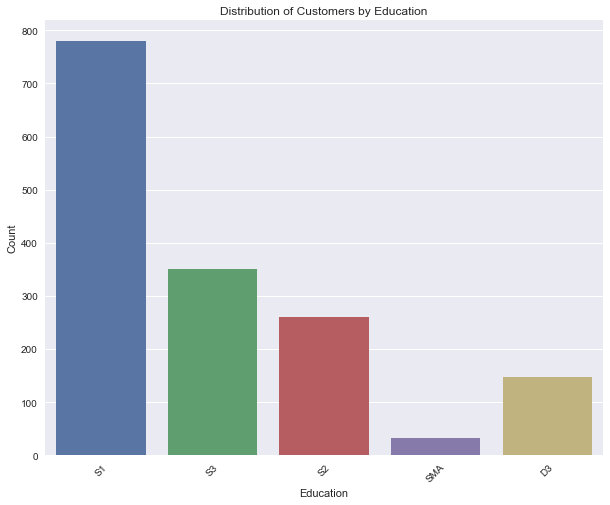

In [18]:
#Bar Chart for Education
plt.figure(figsize=(10, 8))
sns.countplot(data=df_train, x='Education')

plt.title('Distribution of Customers by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

# Education levels in the dataset are denoted by Indonesian terms such as 'S1,' 'S3,' 'S2,' 'SMA,' and 'D3,' each corresponding to distinct educational milestones."

Indonesian Education Levels:

S1 (Strata 1): Equivalent to a Bachelor's degree, this is the first level of higher education (Sarjana/S1). It involves undergraduate studies.

S3 (Strata 3): Corresponds to a Doctorate or PhD (Doktor/S3), the highest academic level attainable with advanced research.

S2 (Strata 2): Represents a Master's degree (Magister/S2) acquired through postgraduate studies.

SMA (Sekolah Menengah Atas): High school or upper secondary education preparing students for further academic pursuits.

D3 (Diploma 3): A three-year diploma program at the tertiary level, offering practical training and skills development.

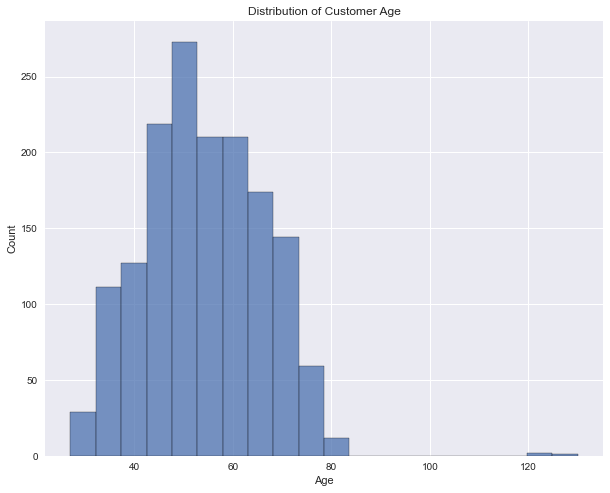

In [19]:
#Histogram for Customer Age
plt.figure(figsize=(10, 8))
sns.histplot(data=df_train, x='Customer_Age', bins=20)

plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

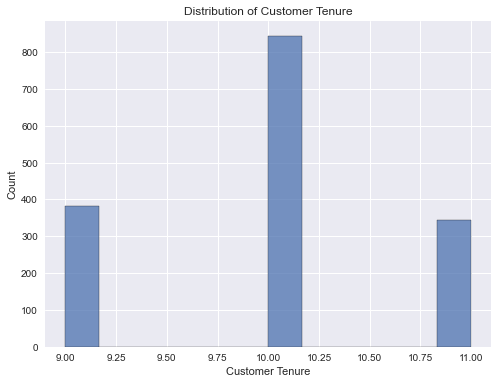

In [20]:
#Box Plot for Tenure
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='customer_tenure')

plt.title('Distribution of Customer Tenure')
plt.xlabel('Customer Tenure')

plt.show()

## Household Composition
The dataset includes the number of children (Kidhome) and teenagers (Teenhome) in customer households. We can analyze how family composition relates to customer behavior.

<Figure size 576x432 with 0 Axes>

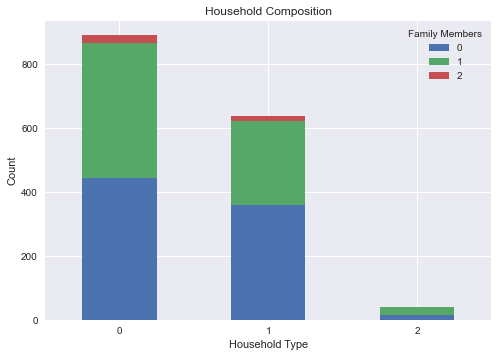

In [21]:
#Stacked Bar Chart for Kidhome and Teenhome
household_comp = df_train[['Kidhome', 'Teenhome']].value_counts().unstack()

plt.figure(figsize=(8, 6))
household_comp.plot(kind='bar', stacked=True)

plt.title('Household Composition')
plt.xlabel('Household Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Family Members', loc='upper right')

plt.show()

## Customer Spending Habits and Product Preferences

- **Customer Spending Habits:** The dataset contains spending data on various product categories like Coke, fruits, meat products, and more. We can investigate how different customer segments spend on these products.

- **Product Preferences:** By examining spending patterns, we can identify which products are most popular among customers and whether there are any seasonal trends in product purchases.

In [22]:
prods = ['Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

# Calculate the count of customers purchasing each product
count = [df_train[prod].gt(0).sum() for prod in prods]

# Create a DataFrame
prod_count = pd.DataFrame({'Products': prods, 'Count': count})
prod_count

,Products,Count
0,Coke,1563
1,Fruits,1282
2,Meat,1571
3,Fish,1302
4,Sweets,1274
5,Gold,1528


In [23]:
prods = ['Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

# Calculate the total amount spent on each product
amt = [df_train[prod].sum() for prod in prods]

# Create a DataFrame
prod_amt = pd.DataFrame({'Products': prods, 'Amount': amt})
prod_amt

,Products,Amount
0,Coke,475716000
1,Fruits,40448000
2,Meat,259468000
3,Fish,57392000
4,Sweets,42255000
5,Gold,67199000


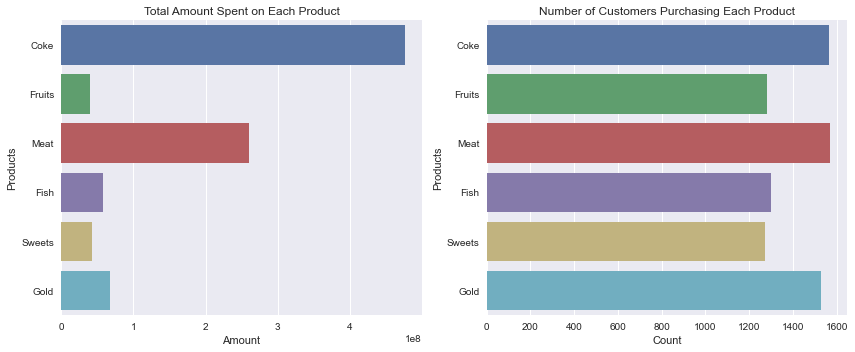

In [24]:
prods = ['Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
amt = [df_train[prod].sum() for prod in prods]
count = [df_train.loc[df_train[prod] > 0, prod].size for prod in prods]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot total amount spent
sns.barplot(x=amt, y=prods, ax=axes[0])
axes[0].set_title('Total Amount Spent on Each Product')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Products')

# Plot customer count
sns.barplot(x=count, y=prods, ax=axes[1])
axes[1].set_title('Number of Customers Purchasing Each Product')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Products')

plt.tight_layout()
plt.show()

### Promotion

- **Promotion Effectiveness:** The dataset includes information on campaigns (AcceptedCmp1 to AcceptedCmp5) and customer responses (Response). We can assess the effectiveness of these marketing campaigns and understand which ones resonate with customers.

In [25]:
# List of columns corresponding to campaign acceptance
campaign_columns = ['Campaign1', 'Campaign2', 'Campaign3', 'Campaign4', 'Campaign5', 'Last_Campaign']

# New DataFrame with only the campaign acceptance columns
campaign_df = df_train[campaign_columns]

# The number of people who accepted each campaign
campaign_counts = campaign_df.sum()

campaign_counts

Campaign1         97
Campaign2         18
Campaign3        111
Campaign4        119
Campaign5        104
Last_Campaign    229
dtype: int64

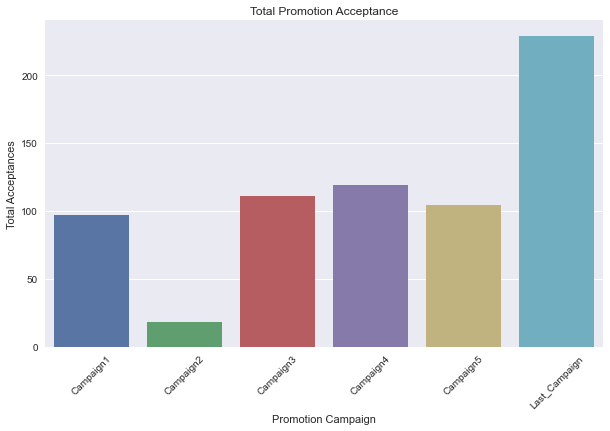

In [26]:
#Bar Chart for Promotion Acceptance

promotion_acceptance = df_train[['Campaign1', 'Campaign2', 'Campaign3', 'Campaign4', 'Campaign5', 'Last_Campaign']]
promotion_counts = promotion_acceptance.sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=promotion_counts.index, y=promotion_counts.values)

plt.title('Total Promotion Acceptance')
plt.xlabel('Promotion Campaign')
plt.ylabel('Total Acceptances')
plt.xticks(rotation=45)

plt.show()

## Complaints and Campaigns
We can analyze whether customer complaints (Complain) impact their responses to marketing campaigns. Do customers who complain tend to respond differently to campaigns?

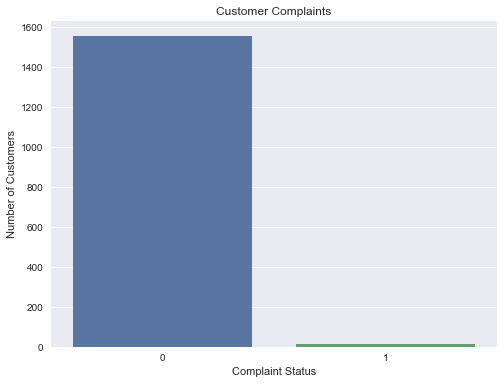

In [27]:
#Bar Chart for Complaints
complaint_counts = df_train['Complain'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=complaint_counts.index, y=complaint_counts.values)

plt.title('Customer Complaints')
plt.xlabel('Complaint Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

plt.show()

In [28]:
count_complain = df_train.groupby(['Complain']).size().reset_index(name='count')
count_complain

,Complain,count
0,0,1555
1,1,16


# Customer Recency and Campaign Acceptance
Understanding the recency of customer purchases (Recency) in relation to campaign acceptance can help us tailor marketing strategies for different customer segments.

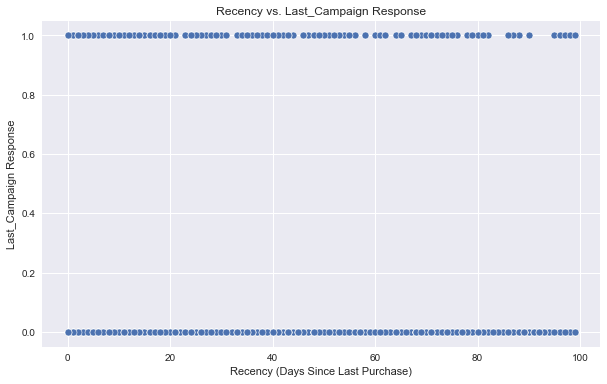

In [29]:
#Scatter Plot for Recency vs. Response

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='Recency', y='Last_Campaign')

plt.title('Recency vs. Last_Campaign Response')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Last_Campaign Response')
plt.xticks(rotation=0)

plt.show()

## Avg Number of Purchase by Channel

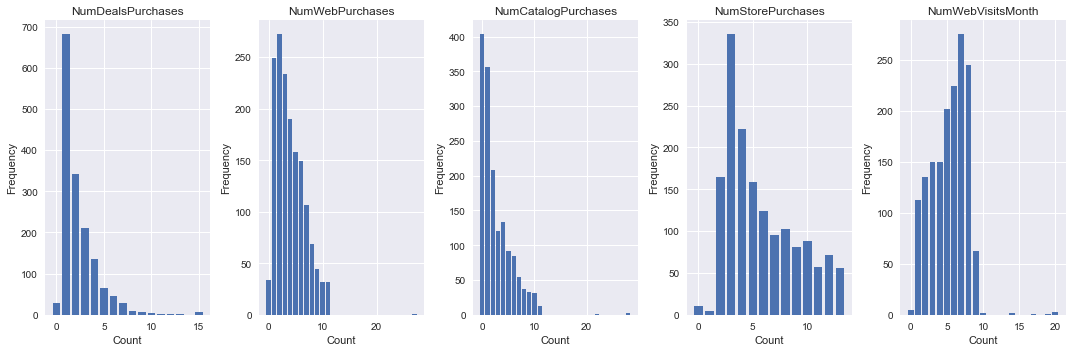

In [30]:
# List of columns to visualize
columns_to_visualize = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_visualize), figsize=(15, 5))

# Iterate through each column and create a bar chart
for i, column_name in enumerate(columns_to_visualize):
    ax = axes[i]
    ax.bar(df_train[column_name].value_counts().index, df_train[column_name].value_counts().values)
    ax.set_title(column_name)
    ax.set_xlabel('Count')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [31]:
# Calculate the total number of occurrences for each column
total_counts = df_train[['NumDealsPurchases', 
                         'NumWebPurchases', 
                         'NumCatalogPurchases', 
                         'NumStorePurchases', 
                         'NumWebVisitsMonth']].sum()

# Create a DataFrame to display the total counts
total_counts_df = pd.DataFrame({'Column Name': total_counts.index, 'Total Count': total_counts.values})

# Display the total counts
print(total_counts_df)

           Column Name  Total Count
0    NumDealsPurchases         3701
1      NumWebPurchases         6335
2  NumCatalogPurchases         4173
3    NumStorePurchases         9072
4    NumWebVisitsMonth         8383


## Encoding categorical columns

In [32]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder for 'Education' column
education_encoder = LabelEncoder()
df_train['Education'] = education_encoder.fit_transform(df_train['Education'])

# Create a label encoder for 'Marital_Status' column
marital_status_encoder = LabelEncoder()
df_train['Marital_Status'] = marital_status_encoder.fit_transform(df_train['Marital_Status'])

# Convert the encoded columns to int64 data type
df_train[['Education', 'Marital_Status']] = df_train[['Education', 'Marital_Status']].astype('int64')

In [33]:
df_train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign,Customer_Age,customer_tenure
0,1,4,58138000.0,0,0,58,635000,88000,546000,172000,...,7,0,0,0,0,0,0,1,66,11
1,1,4,46344000.0,1,1,38,11000,1000,6000,2000,...,5,0,0,0,0,0,0,0,69,9
2,1,2,71613000.0,0,0,26,426000,49000,127000,111000,...,4,0,0,0,0,0,0,0,58,10
3,1,2,26646000.0,1,0,26,11000,4000,20000,10000,...,6,0,0,0,0,0,0,0,39,9
4,3,3,58293000.0,1,0,94,173000,43000,118000,46000,...,5,0,0,0,0,0,0,0,42,9


In [34]:
df_train.tail()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign,Customer_Age,customer_tenure
1566,0,2,20193000.0,0,0,18,8000,8000,22000,24000,...,4,0,0,0,0,0,0,0,32,11
1567,1,3,27573000.0,1,0,45,50000,15000,110000,39000,...,8,0,0,0,0,0,0,0,48,10
1568,4,4,15862000.0,1,0,26,1000,1000,4000,11000,...,8,0,0,0,0,0,0,0,44,10
1569,3,3,49544000.0,1,0,0,308000,0,73000,0,...,7,0,0,0,0,0,0,0,47,10
1570,1,3,33228000.0,1,0,28,22000,2000,31000,7000,...,7,0,0,0,0,0,0,0,43,9


In [35]:
# Summary of the DataFrame's information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1571 non-null   int64  
 1   Marital_Status       1571 non-null   int64  
 2   Income               1554 non-null   float64
 3   Kidhome              1571 non-null   int64  
 4   Teenhome             1571 non-null   int64  
 5   Recency              1571 non-null   int64  
 6   Coke                 1571 non-null   int64  
 7   Fruits               1571 non-null   int64  
 8   Meat                 1571 non-null   int64  
 9   Fish                 1571 non-null   int64  
 10  Sweets               1571 non-null   int64  
 11  Gold                 1571 non-null   int64  
 12  NumDealsPurchases    1571 non-null   int64  
 13  NumWebPurchases      1571 non-null   int64  
 14  NumCatalogPurchases  1571 non-null   int64  
 15  NumStorePurchases    1571 non-null   i

In [36]:
# Find the missing values in each columns 
df_train.isnull().sum()

Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Recency                 0
Coke                    0
Fruits                  0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Campaign3               0
Campaign4               0
Campaign5               0
Campaign1               0
Campaign2               0
Complain                0
Last_Campaign           0
Customer_Age            0
customer_tenure         0
dtype: int64

In [37]:
# # Fill missing values in the 'Income' column with the median income value.
df_train["Income"].fillna(df_train["Income"].median(), inplace=True)

In [38]:
# Checking again if missing values still present
df_train.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
Coke                   0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Campaign3              0
Campaign4              0
Campaign5              0
Campaign1              0
Campaign2              0
Complain               0
Last_Campaign          0
Customer_Age           0
customer_tenure        0
dtype: int64

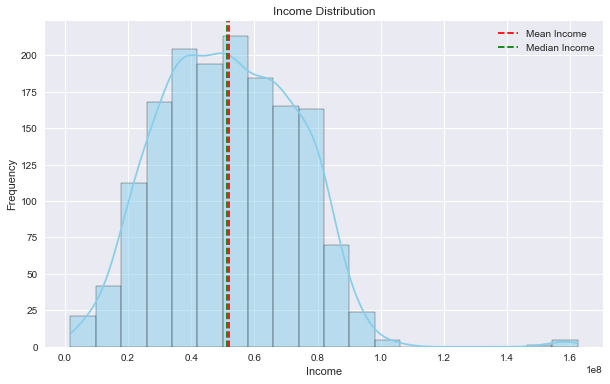

In [39]:
# Create a histogram with KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 6))

sns.histplot(df_train['Income'], kde=True, bins=20, color='skyblue')

plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.grid(True)

# Add statistics to the plot
plt.axvline(x=np.mean(df_train['Income']), color='red', linestyle='--', label='Mean Income')
plt.axvline(x=np.median(df_train['Income']), color='green', linestyle='--', label='Median Income')
plt.legend()

# Show the plot
plt.show()

In [40]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
income_skewness = skew(df_train['Income'])
income_kurtosis = kurtosis(df_train['Income'], fisher=False)

print(f'Skewness of Income: {income_skewness:.2f}')
print(f'Kurtosis of Income: {income_kurtosis:.2f}')

Skewness of Income: 0.43
Kurtosis of Income: 4.16


Retaining high-income customers is essential to preserve data integrity, gain insights into diverse customer behavior, and align with our business strategy for targeted campaigns and customer engagement, making their exclusion unnecessary.

In [41]:
# Summary statistics.
df_train.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign,Customer_Age,customer_tenure
count,1571.000000,1571.000000,1.571000e+03,1571.000000,1571.000000,1571.000000,1.571000e+03,1571.000000,1.571000e+03,1571.000000,...,1571.000000,1571.000000,1571.000000,1571.00000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000
mean,1.581795,2.705283,5.195792e+07,0.457034,0.504137,48.624443,3.028109e+05,25746.658180,1.651610e+05,36532.145130,...,5.336092,0.070656,0.075748,0.06620,0.061744,0.011458,0.010185,0.145767,54.168682,9.975812
std,1.001985,1.212605,2.137153e+07,0.545888,0.551040,28.971548,3.367711e+05,39449.614482,2.252443e+05,53960.926691,...,2.457867,0.256330,0.264679,0.24871,0.240767,0.106459,0.100436,0.352985,12.025406,0.680521
min,0.000000,0.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,27.000000,9.000000
25%,1.000000,2.000000,3.582850e+07,0.000000,0.000000,24.000000,2.300000e+04,1000.000000,1.600000e+04,3000.000000,...,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,46.000000,10.000000
50%,1.000000,3.000000,5.125850e+07,0.000000,0.000000,49.000000,1.720000e+05,8000.000000,6.700000e+04,12000.000000,...,6.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,53.000000,10.000000
75%,2.000000,3.500000,6.754100e+07,1.000000,1.000000,74.000000,4.925000e+05,32000.000000,2.275000e+05,46500.000000,...,7.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,63.000000,10.000000
max,4.000000,5.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,...,20.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,130.000000,11.000000


# Overall featuire distribution visual

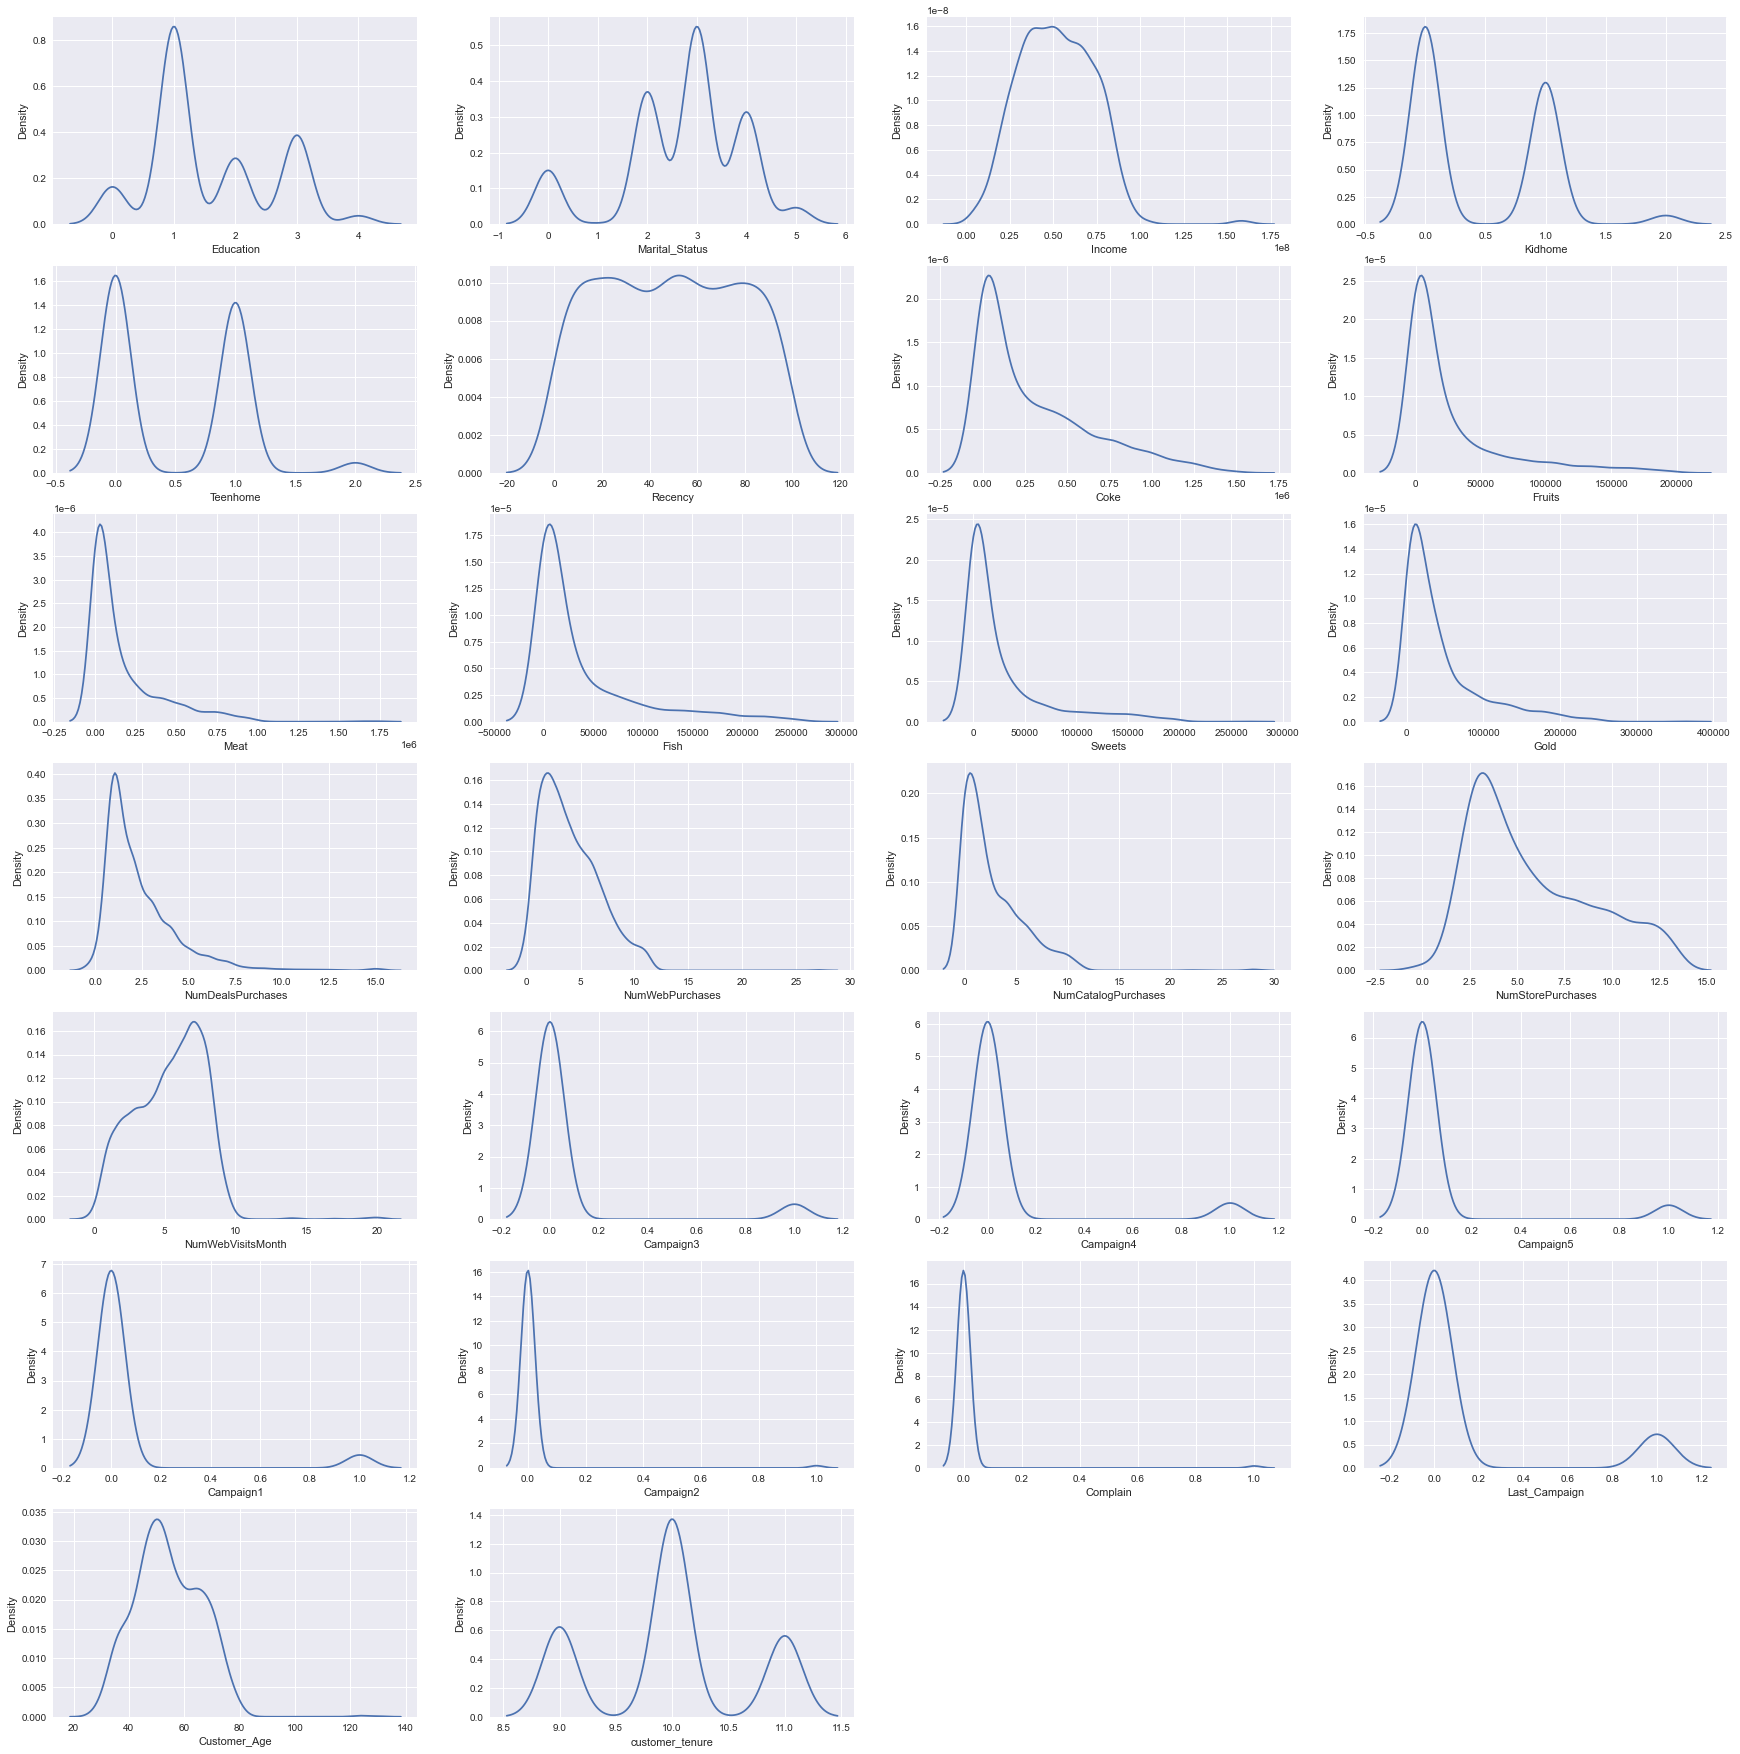

In [42]:
# Create a figure with a specified size (20 units wide and 10 units tall).
plt.figure(figsize=(30, 45))

# Loop through each column in the DataFrame.
for i, col in enumerate(df_train.columns):
    # Check if the column's data type is not 'object' (i.e., numeric).
    if df_train[col].dtype != 'object':
        # Create a subplot in a 6x4 grid layout and position it using 'i + 1'.
        ax = plt.subplot(10, 4, i + 1)
        
        # Plot the Kernel Density Estimate (KDE) for the current column.
        sns.kdeplot(df_train[col], ax=ax)
        
        # Set the x-axis label to the column name.
        plt.xlabel(col)

# Display the entire figure with subplots.
plt.show()

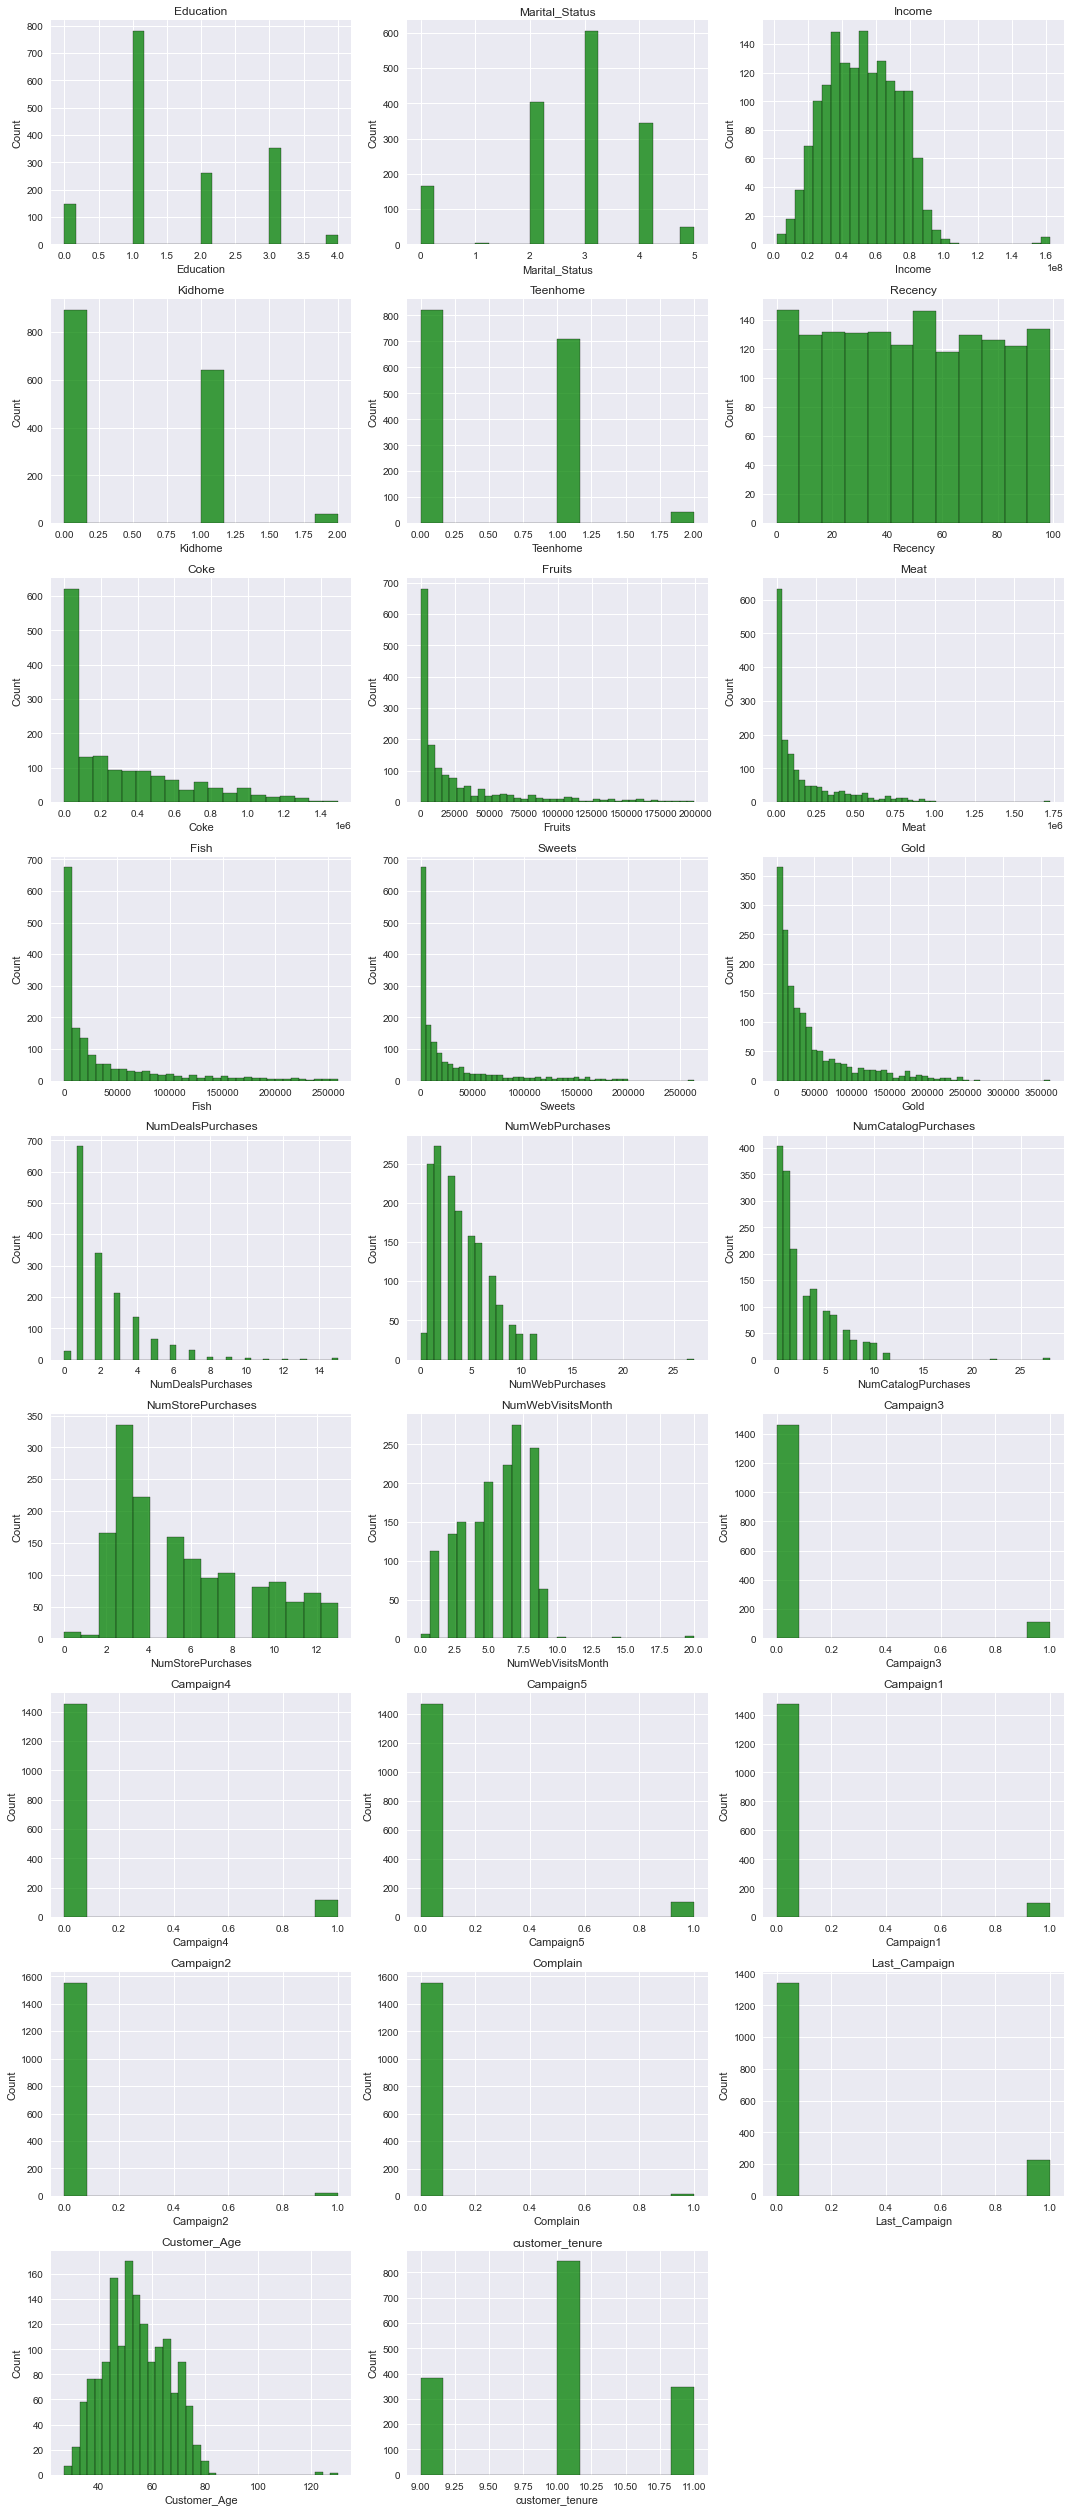

In [43]:
# Calculate the number of rows and columns for subplots
n_columns = 3  # Number of subplots per line
n_rows = (26 + 1) // n_columns  # Calculate the number of lines

plt.figure(figsize=(15, 35))  

for i in range(0, 26):
    plt.subplot(n_rows, n_columns, i + 1)
    sns.histplot(df_train[df_train.columns[i]], kde_kws={'color': 'b', 'bw': 0.1, 'lw': 3, 'label': 'KDE'}, color='g')
    plt.title(df_train.columns[i])

plt.tight_layout()
plt.show()

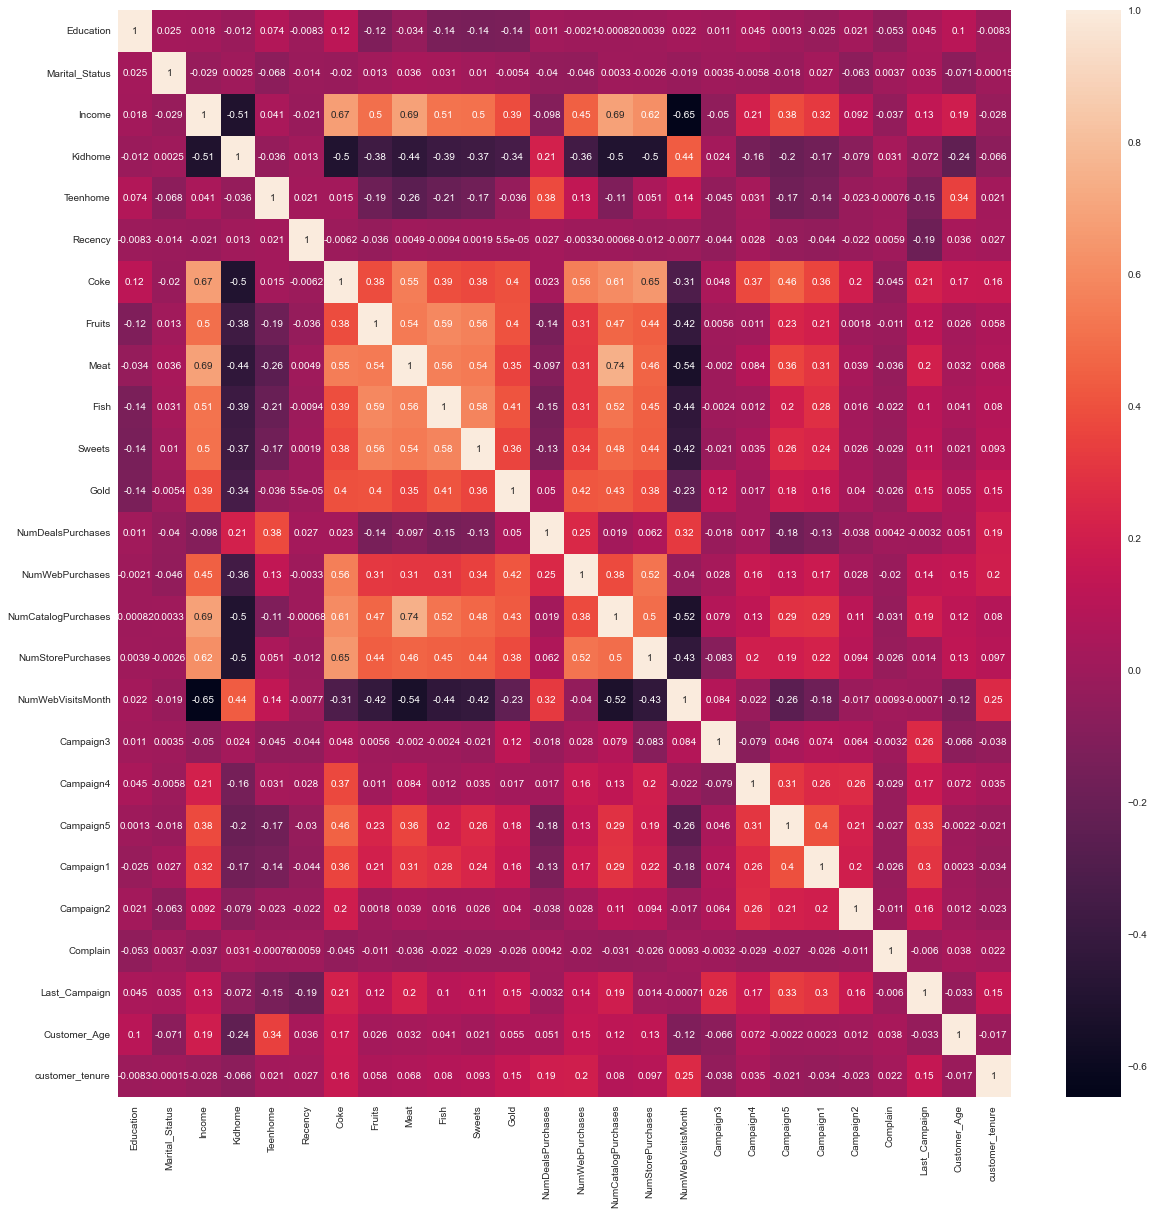

In [44]:
plt.figure(figsize =(20,20))
           
sns.heatmap(df_train.corr(), annot=True)
           
plt.show()

# Finding outliers and removing by using 'Age'

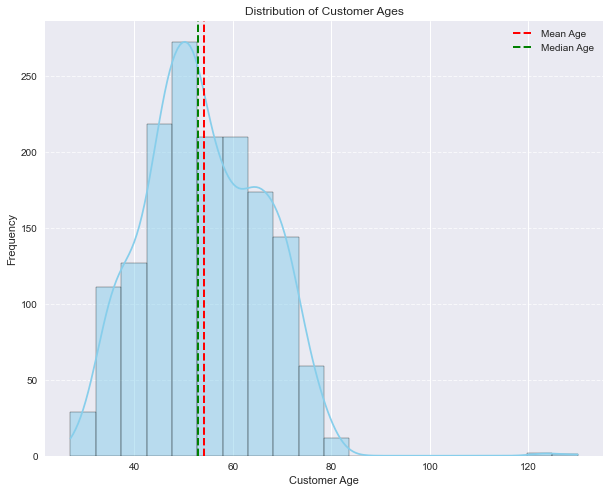

In [45]:
# Histogram plot with KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 8))
sns.histplot(data=df_train, x='Customer_Age', kde=True, color='skyblue', bins=20)
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title("Distribution of Customer Ages")

# Customize grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add vertical lines for mean and median
mean_age = df_train['Customer_Age'].mean()
median_age = df_train['Customer_Age'].median()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Mean Age')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label='Median Age')

# Add legend
plt.legend()

plt.show()

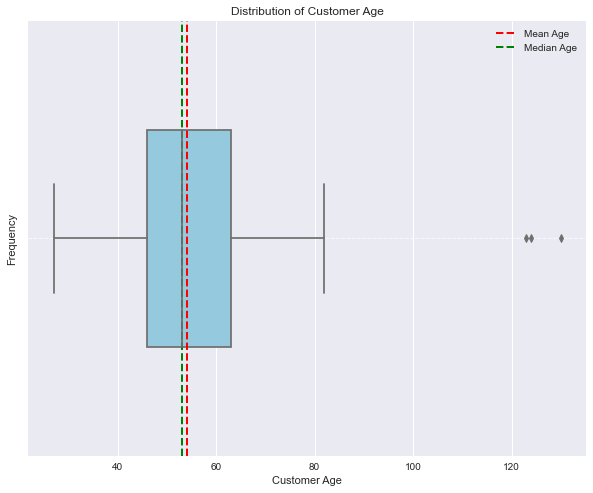

In [46]:
# Boxplot with customizations
plt.figure(figsize=(10, 8))
sns.boxplot(x=df_train['Customer_Age'], color='skyblue', width=0.5)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add mean and median lines
mean_age = df_train['Customer_Age'].mean()
median_age = df_train['Customer_Age'].median()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Mean Age')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label='Median Age')

# Add labels and legend
plt.ylabel('Frequency')
plt.legend()

plt.show()

# IQR Method
Q1 = .25 of data
Q3 = .75 of data

IQR = Q3 - Q1

Upper Limit = Q3 + (1.5*IQR)

Lower Limit = Q1 - (1.5*IQR)

In [47]:
Q1 = df_train['Customer_Age'].quantile(.25)
Q3 = df_train['Customer_Age'].quantile(.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

In [48]:
# Outliers -
IQR_Outlier = df_train.loc[(df_train['Customer_Age']>=upper_bound) | (df_train['Customer_Age']<= lower_bound )]

#Without Outlier 
IQR_without_Outlier =df_train.loc[(df_train['Customer_Age']<=upper_bound) & (df_train['Customer_Age']>= lower_bound )]

# Data Without Outliers
new_df_train = IQR_without_Outlier
new_df_train

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign,Customer_Age,customer_tenure
0,1,4,58138000.0,0,0,58,635000,88000,546000,172000,...,7,0,0,0,0,0,0,1,66,11
1,1,4,46344000.0,1,1,38,11000,1000,6000,2000,...,5,0,0,0,0,0,0,0,69,9
2,1,2,71613000.0,0,0,26,426000,49000,127000,111000,...,4,0,0,0,0,0,0,0,58,10
3,1,2,26646000.0,1,0,26,11000,4000,20000,10000,...,6,0,0,0,0,0,0,0,39,9
4,3,3,58293000.0,1,0,94,173000,43000,118000,46000,...,5,0,0,0,0,0,0,0,42,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,0,2,20193000.0,0,0,18,8000,8000,22000,24000,...,4,0,0,0,0,0,0,0,32,11
1567,1,3,27573000.0,1,0,45,50000,15000,110000,39000,...,8,0,0,0,0,0,0,0,48,10
1568,4,4,15862000.0,1,0,26,1000,1000,4000,11000,...,8,0,0,0,0,0,0,0,44,10
1569,3,3,49544000.0,1,0,0,308000,0,73000,0,...,7,0,0,0,0,0,0,0,47,10


In [49]:
# Old Data and New Data

print('Old Data with Outlier:', len(df_train))
print('New Data without Outlier:',len(new_df_train))
print ('Total Outliers:', len(IQR_Outlier))

Old Data with Outlier: 1571
New Data without Outlier: 1568
Total Outliers: 3


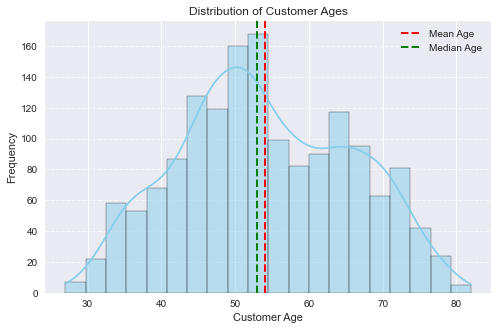

In [50]:
# Histogram plot with KDE (Kernel Density Estimation)
plt.figure(figsize=(8, 5))
sns.histplot(data=new_df_train, x='Customer_Age', kde=True, color='skyblue', bins=20)
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title("Distribution of Customer Ages")

# Customize grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add vertical lines for mean and median
mean_age = new_df_train['Customer_Age'].mean()
median_age = new_df_train['Customer_Age'].median()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Mean Age')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label='Median Age')

# Add legend
plt.legend()

plt.show()

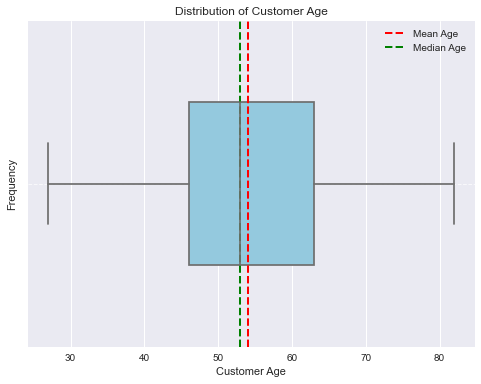

In [51]:
# Boxplot with customizations
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df_train['Customer_Age'], color='skyblue', width=0.5)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add mean and median lines
mean_age = new_df_train['Customer_Age'].mean()
median_age = new_df_train['Customer_Age'].median()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Mean Age')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label='Median Age')

# Add labels and legend
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [52]:
new_df_train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign,Customer_Age,customer_tenure
0,1,4,58138000.0,0,0,58,635000,88000,546000,172000,...,7,0,0,0,0,0,0,1,66,11
1,1,4,46344000.0,1,1,38,11000,1000,6000,2000,...,5,0,0,0,0,0,0,0,69,9
2,1,2,71613000.0,0,0,26,426000,49000,127000,111000,...,4,0,0,0,0,0,0,0,58,10
3,1,2,26646000.0,1,0,26,11000,4000,20000,10000,...,6,0,0,0,0,0,0,0,39,9
4,3,3,58293000.0,1,0,94,173000,43000,118000,46000,...,5,0,0,0,0,0,0,0,42,9


In [53]:
new_df_train.shape

(1568, 26)

In [54]:
new_df_train.dtypes

Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Coke                     int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Campaign3                int64
Campaign4                int64
Campaign5                int64
Campaign1                int64
Campaign2                int64
Complain                 int64
Last_Campaign            int64
Customer_Age             int64
customer_tenure          int64
dtype: object

In [55]:
new_df_train.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign3', 'Campaign4',
       'Campaign5', 'Campaign1', 'Campaign2', 'Complain', 'Last_Campaign',
       'Customer_Age', 'customer_tenure'],
      dtype='object')

In [56]:
new_df_train.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
Coke                   0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Campaign3              0
Campaign4              0
Campaign5              0
Campaign1              0
Campaign2              0
Complain               0
Last_Campaign          0
Customer_Age           0
customer_tenure        0
dtype: int64

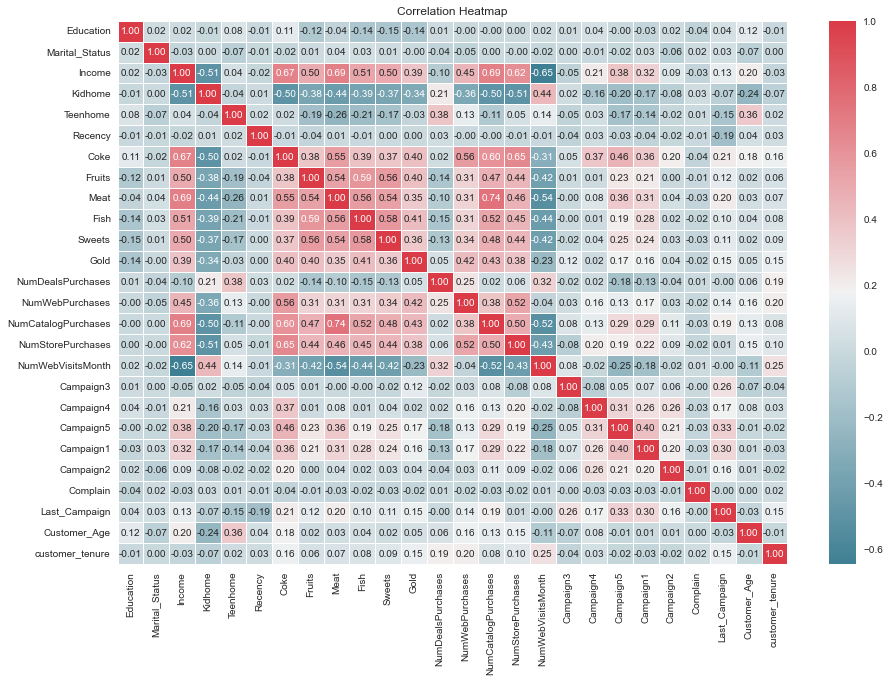

In [57]:
# Set a larger figure size
plt.figure(figsize=(15, 10))

# Generate a correlation matrix
correlation_matrix = new_df_train.corr()

# Define a custom color map (e.g., 'coolwarm', 'viridis', 'RdBu_r')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap with annotations and custom color map
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, cbar=True, linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()

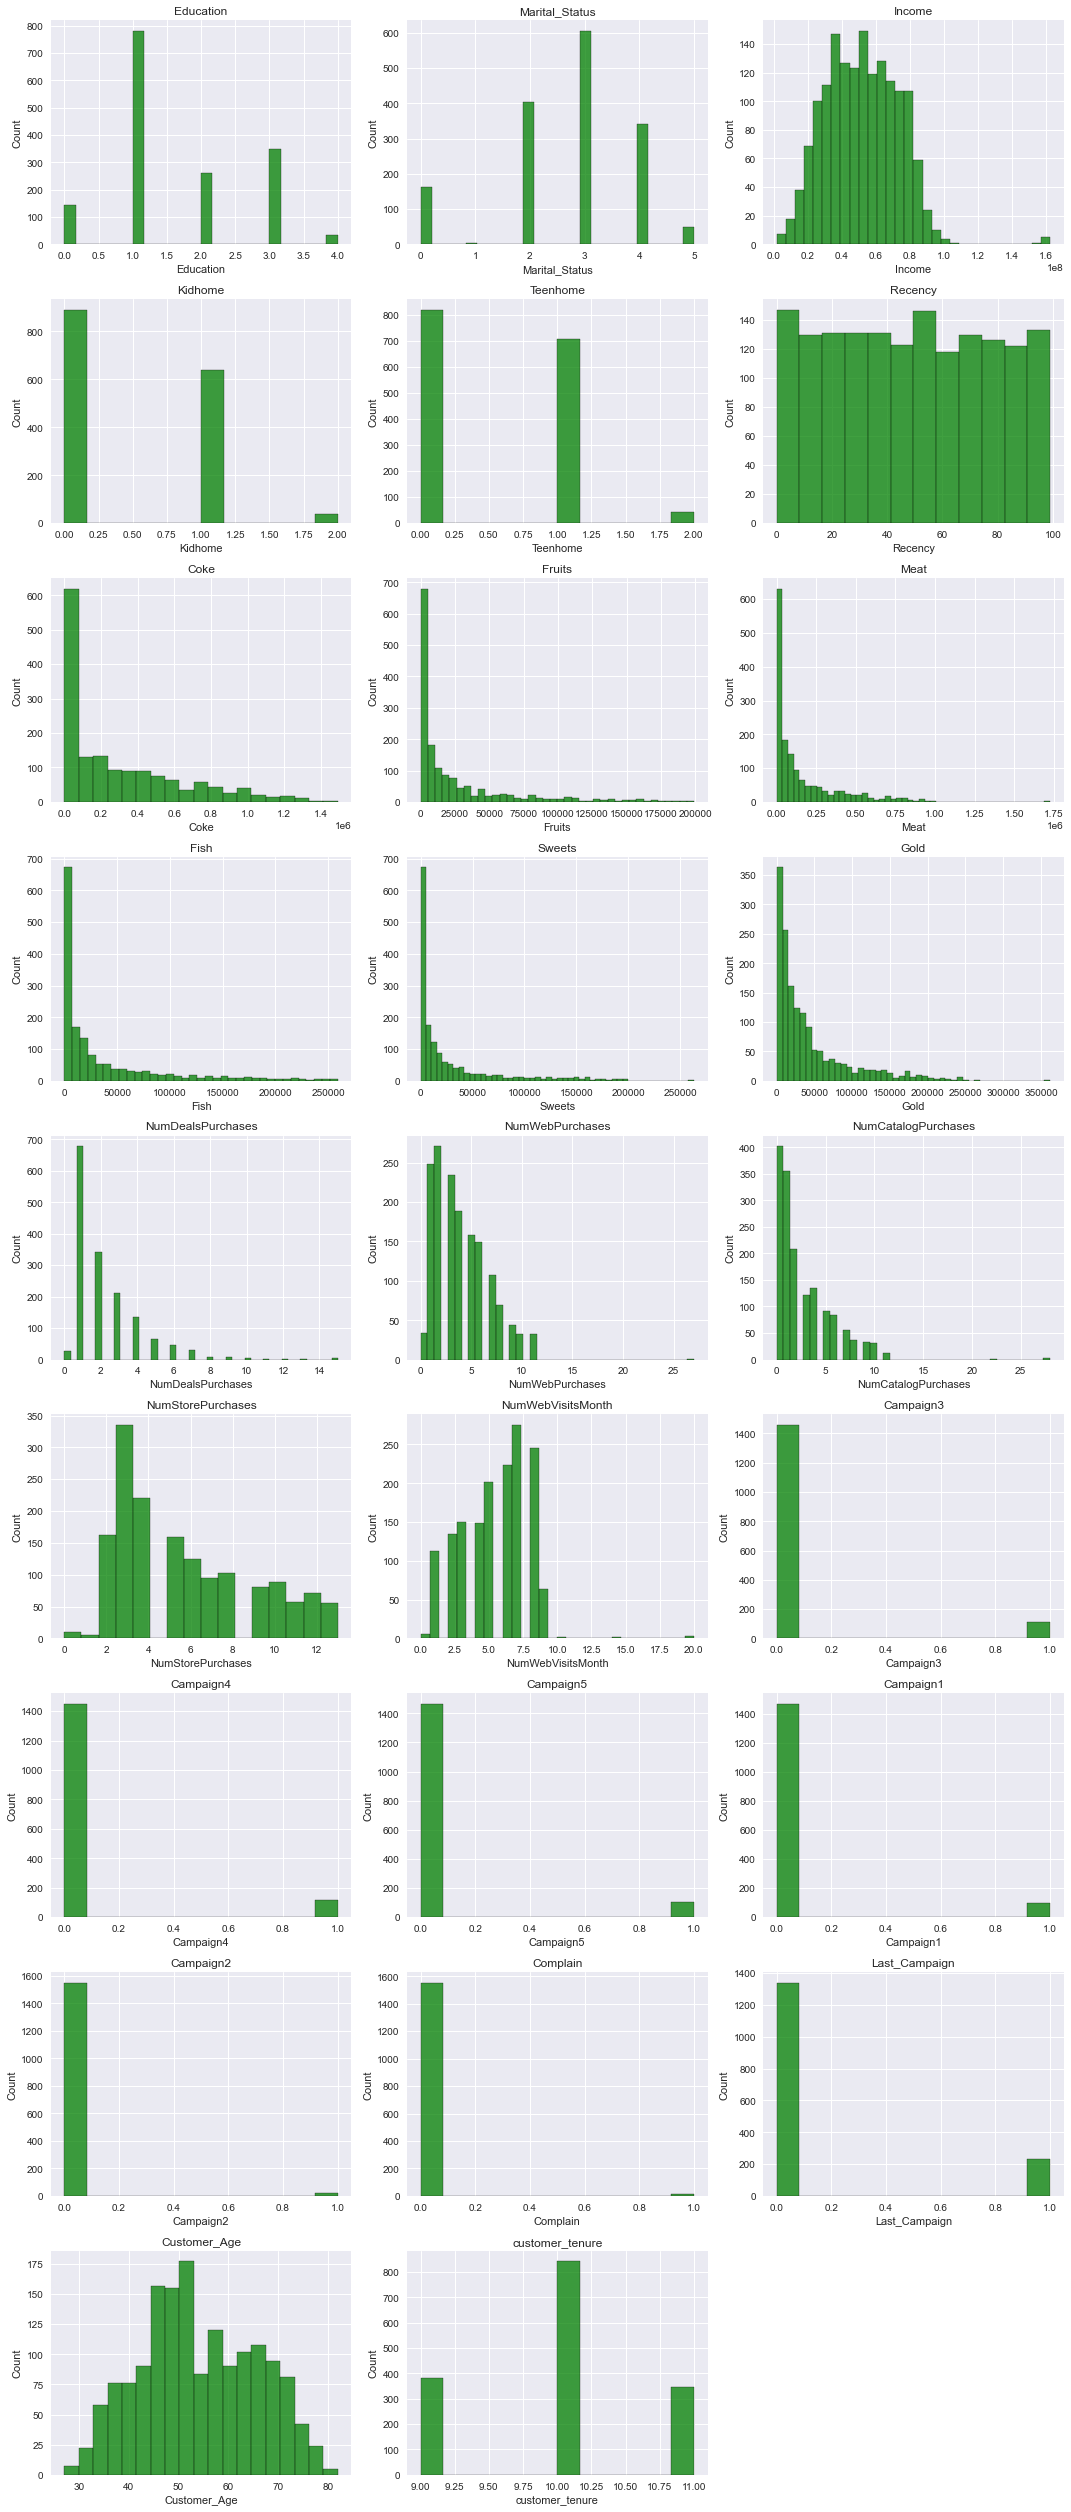

In [58]:
# Calculate the number of rows and columns for subplots
n_columns = 3  # Number of subplots per line
n_rows = (26 + 1) // n_columns  # Calculate the number of lines

plt.figure(figsize=(15, 35))  

for i in range(0, 26):
    plt.subplot(n_rows, n_columns, i + 1)
    sns.histplot(new_df_train[new_df_train.columns[i]], kde_kws={'color': 'b', 'bw': 0.1, 'lw': 3, 'label': 'KDE'}, color='g')
    plt.title(new_df_train.columns[i])

plt.tight_layout()
plt.show()

## Scaling the DataFrame

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df_train = pd.DataFrame(scaler.fit_transform(new_df_train), columns=new_df_train.columns)
scaled_df_train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign,Customer_Age,customer_tenure
0,-0.582681,1.068121,0.289982,-0.837768,-0.915618,0.324086,0.986556,1.583097,1.692139,2.510710,...,0.675722,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,2.418090,1.030138,1.504166
1,-0.582681,1.068121,-0.262022,0.994339,0.899412,-0.366686,-0.867103,-0.627657,-0.706863,-0.639881,...,-0.138363,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,1.288358,-1.434815
2,-0.582681,-0.583569,0.920664,-0.837768,-0.915618,-0.781150,0.365699,0.592069,-0.169309,1.380204,...,-0.545406,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,0.341549,0.034675
3,-0.582681,-0.583569,-1.183964,0.994339,-0.915618,-0.781150,-0.867103,-0.551425,-0.644667,-0.491618,...,0.268679,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-1.293848,-1.434815
4,1.416540,0.242276,0.297237,0.994339,-0.915618,1.567476,-0.385864,0.439603,-0.209292,0.175566,...,-0.138363,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-1.035627,-1.434815


In [60]:
scaled_df_train.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
Coke                   0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Campaign3              0
Campaign4              0
Campaign5              0
Campaign1              0
Campaign2              0
Complain               0
Last_Campaign          0
Customer_Age           0
customer_tenure        0
dtype: int64

In [61]:
scaled_df_train.shape

(1568, 26)

## Finding 'k' value by Elbow Method

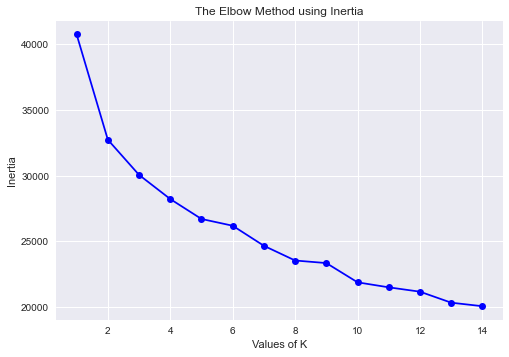

In [62]:
# Initialize the range of cluster values (K)
range_val = range(1, 15)

# Create an empty list to store the inertia values
inertia = []

# Loop through different values of K
for i in range_val:
    # Create a KMeans model with 'i' clusters
    kmeans = KMeans(n_clusters=i)
    
    # Fit and predict using the scaled dataset
    kmeans.fit_predict(scaled_df_train)
    
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range_val, inertia, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

plt.show()

In [63]:
km = KMeans(n_clusters = 4)
y_predicted = km.fit_predict(scaled_df_train)
y_predicted

array([2, 1, 2, ..., 1, 1, 1])

In [64]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(scaled_df_train, y_predicted)
silhouette_avg

0.15791344244274563

In [65]:
from sklearn.manifold import TSNE


In [66]:
tsne = TSNE(n_components=2, perplexity=35, n_iter=300, random_state=42)
df_tsne = tsne.fit_transform(scaled_df_train)
    
df_tsne

array([[  4.0054307,  11.400637 ],
       [-12.565898 ,  -6.5177174],
       [ -1.1882805,   9.145075 ],
       ...,
       [  2.697957 , -17.019314 ],
       [ -5.9644012, -13.126163 ],
       [ -5.166007 , -15.531619 ]], dtype=float32)

In [67]:
df_tsne.shape

(1568, 2)

In [68]:
df_tsne = pd.DataFrame(data=df_tsne, columns=['component 1', 'component 2'])
df_tsne.head()

,component 1,component 2
0,4.005431,11.400637
1,-12.565898,-6.517717
2,-1.188280,9.145075
3,-4.811964,-15.737864
4,-1.127588,-17.953300


In [69]:
scaled_df_train.iloc[:5, :24]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign
0,-0.582681,1.068121,0.289982,-0.837768,-0.915618,0.324086,0.986556,1.583097,1.692139,2.510710,...,2.466707,-0.549834,0.675722,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,2.418090
1,-0.582681,1.068121,-0.262022,0.994339,0.899412,-0.366686,-0.867103,-0.627657,-0.706863,-0.639881,...,-0.556584,-1.167413,-0.138363,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549
2,-0.582681,-0.583569,0.920664,-0.837768,-0.915618,-0.781150,0.365699,0.592069,-0.169309,1.380204,...,-0.220663,1.302902,-0.545406,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549
3,-0.582681,-0.583569,-1.183964,0.994339,-0.915618,-0.781150,-0.867103,-0.551425,-0.644667,-0.491618,...,-0.892505,-0.549834,0.268679,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549
4,1.416540,0.242276,0.297237,0.994339,-0.915618,1.567476,-0.385864,0.439603,-0.209292,0.175566,...,0.115259,0.067745,-0.138363,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549


In [70]:
wcss = []     
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df_tsne)
    wcss.append(kmeans.inertia_)

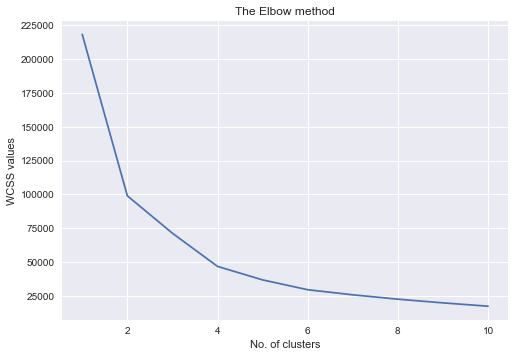

In [71]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS values')
plt.show()

# Model Building using KMeans

In [72]:
# Choose the optimal K value based on the Elbow Method
optimal_k = 4  # Replace with the value you determined from the elbow plot

# Create a KMeans model with the optimal K value
kmeans = KMeans(n_clusters=optimal_k)

# Fit and predict using the scaled dataset
cluster_assignments = kmeans.fit_predict(scaled_df_train)

# Add cluster assignments to the original dataset
df_with_clusters = pd.concat([scaled_df_train, pd.DataFrame({'Cluster': cluster_assignments})], axis=1)
df_with_clusters

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign,Customer_Age,customer_tenure,Cluster
0,-0.582681,1.068121,0.289982,-0.837768,-0.915618,0.324086,0.986556,1.583097,1.692139,2.510710,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,2.418090,1.030138,1.504166,0
1,-0.582681,1.068121,-0.262022,0.994339,0.899412,-0.366686,-0.867103,-0.627657,-0.706863,-0.639881,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,1.288358,-1.434815,2
2,-0.582681,-0.583569,0.920664,-0.837768,-0.915618,-0.781150,0.365699,0.592069,-0.169309,1.380204,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,0.341549,0.034675,0
3,-0.582681,-0.583569,-1.183964,0.994339,-0.915618,-0.781150,-0.867103,-0.551425,-0.644667,-0.491618,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-1.293848,-1.434815,2
4,1.416540,0.242276,0.297237,0.994339,-0.915618,1.567476,-0.385864,0.439603,-0.209292,0.175566,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-1.035627,-1.434815,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,-1.582292,-0.583569,-1.485990,-0.837768,-0.915618,-1.057459,-0.876015,-0.449781,-0.635781,-0.232158,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-1.896362,1.504166,2
1564,-0.582681,0.242276,-1.140577,0.994339,-0.915618,-0.124916,-0.751249,-0.271904,-0.244833,0.045836,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-0.519186,0.034675,2
1565,2.416151,1.068121,-1.688697,0.994339,-0.915618,-0.781150,-0.896809,-0.627657,-0.715748,-0.473085,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-0.863480,0.034675,2
1566,1.416540,0.242276,-0.112250,0.994339,-0.915618,-1.679154,0.015168,-0.653068,-0.409209,-0.676947,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-0.605259,0.034675,2


In [73]:
df_with_clusters.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
Coke                   0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Campaign3              0
Campaign4              0
Campaign5              0
Campaign1              0
Campaign2              0
Complain               0
Last_Campaign          0
Customer_Age           0
customer_tenure        0
Cluster                0
dtype: int64

In [74]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_df_train, cluster_assignments)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.1561668534457632


In [75]:
# Calculate the inertia
inertia = kmeans.inertia_
print("Inertia (Within-Cluster Sum of Squares(WCSS)):", inertia)

Inertia (Within-Cluster Sum of Squares(WCSS)): 28223.598017155888


In [76]:
scaled_df_train.loc[:, 'Cluster'] = cluster_assignments
scaled_df_train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign,Customer_Age,customer_tenure,Cluster
0,-0.582681,1.068121,0.289982,-0.837768,-0.915618,0.324086,0.986556,1.583097,1.692139,2.510710,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,2.418090,1.030138,1.504166,0
1,-0.582681,1.068121,-0.262022,0.994339,0.899412,-0.366686,-0.867103,-0.627657,-0.706863,-0.639881,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,1.288358,-1.434815,2
2,-0.582681,-0.583569,0.920664,-0.837768,-0.915618,-0.781150,0.365699,0.592069,-0.169309,1.380204,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,0.341549,0.034675,0
3,-0.582681,-0.583569,-1.183964,0.994339,-0.915618,-0.781150,-0.867103,-0.551425,-0.644667,-0.491618,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-1.293848,-1.434815,2
4,1.416540,0.242276,0.297237,0.994339,-0.915618,1.567476,-0.385864,0.439603,-0.209292,0.175566,...,-0.276014,-0.286576,-0.265155,-0.256791,-0.107763,-0.098279,-0.413549,-1.035627,-1.434815,2


In [77]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(scaled_df_train, cluster_assignments)
silhouette_avg

0.1698952018464674

## Visualizing the clustered dataframe

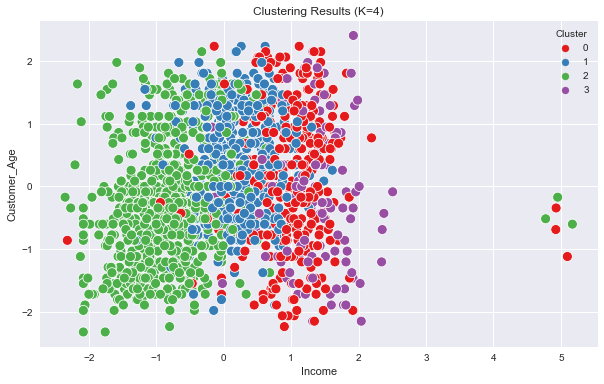

In [78]:
# Visualize the clustered data
plt.figure(figsize=(10, 6))

sns.scatterplot(data=scaled_df_train, x='Income', y='Customer_Age', hue='Cluster', palette='Set1', s=100)
plt.title('Clustering Results (K={})'.format(optimal_k))

plt.show()

In [79]:
df_with_clusters.shape

(1568, 27)

In [80]:
df_with_clusters.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign,Customer_Age,customer_tenure,Cluster
count,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,...,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1568.000000
mean,7.788554e-17,1.479825e-17,5.565276e-17,8.029292e-17,-1.438758e-16,-5.529874e-17,-7.038021e-17,-4.411154e-17,9.070126e-17,-6.053831e-17,...,-2.382590e-16,2.397459e-16,-8.022211e-17,-1.529389e-17,2.085031e-16,-9.974660e-17,-2.141144e-16,-3.186227e-18,-2.625451e-16,1.382653
std,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,...,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,0.886115
min,-1.582292e+00,-2.235260e+00,-2.350129e+00,-8.377683e-01,-9.156178e-01,-1.679154e+00,-8.997796e-01,-6.530684e-01,-7.290759e-01,-6.769468e-01,...,-2.760144e-01,-2.865757e-01,-2.651550e-01,-2.567908e-01,-1.077632e-01,-9.827881e-02,-4.135495e-01,-2.326730e+00,-1.434815e+00,0.000000
25%,-5.826812e-01,-5.835693e-01,-7.557326e-01,-8.377683e-01,-9.156178e-01,-8.502269e-01,-8.314556e-01,-6.276574e-01,-6.624369e-01,-6.213481e-01,...,-2.760144e-01,-2.865757e-01,-2.651550e-01,-2.567908e-01,-1.077632e-01,-9.827881e-02,-4.135495e-01,-6.913330e-01,3.467548e-02,1.000000
50%,-5.826812e-01,2.422761e-01,-3.200477e-02,-8.377683e-01,-9.156178e-01,1.323833e-02,-3.888351e-01,-4.497806e-01,-4.358646e-01,-4.545522e-01,...,-2.760144e-01,-2.865757e-01,-2.651550e-01,-2.567908e-01,-1.077632e-01,-9.827881e-02,-4.135495e-01,-8.881823e-02,3.467548e-02,2.000000
75%,4.169294e-01,4.487374e-01,7.299618e-01,9.943387e-01,8.994122e-01,8.767036e-01,5.625020e-01,1.600826e-01,2.760614e-01,1.801992e-01,...,-2.760144e-01,-2.865757e-01,-2.651550e-01,-2.567908e-01,-1.077632e-01,-9.827881e-02,-4.135495e-01,7.719171e-01,3.467548e-02,2.000000
max,2.416151e+00,1.893967e+00,5.169704e+00,2.826446e+00,2.714442e+00,1.740169e+00,3.532367e+00,4.403714e+00,6.929959e+00,4.123071e+00,...,3.623000e+00,3.489480e+00,3.771379e+00,3.894220e+00,9.279607e+00,1.017513e+01,2.418090e+00,2.407314e+00,1.504166e+00,3.000000


In [81]:
# Find all cluster centers
cluster_centers = kmeans.cluster_centers_

# Inverse transform the cluster centers to the original scale
cluster_centers_original_scale = scaler.inverse_transform(cluster_centers)

# Create a DataFrame to store the cluster centers with the same columns as your original DataFrame
cluster_centers_df = pd.DataFrame(data=cluster_centers_original_scale, columns=new_df_train.columns)

# Display the cluster centers
print("Cluster Centers (Original Scale):")
cluster_centers_df

Cluster Centers (Original Scale):


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign,Customer_Age,customer_tenure
0,1.428125,2.837500,7.305723e+07,0.037500,0.221875,48.431250,492996.875000,69812.500000,433353.125000,102446.875000,...,2.803125,0.062500,0.031250,6.938894e-17,0.115625,1.734723e-18,6.250000e-03,0.153125,55.059375,9.987500
1,1.742009,2.518265,5.661648e+07,0.267123,0.931507,48.383562,443691.780822,18342.465753,121799.086758,25657.534247,...,5.892694,0.050228,0.134703,1.387779e-16,0.022831,6.849315e-03,9.132420e-03,0.102740,58.833333,10.152968
2,1.555714,2.777143,3.473102e+07,0.831429,0.422857,49.277143,36894.285714,5188.571429,22922.857143,6970.000000,...,6.501429,0.081429,0.004286,1.804112e-16,0.001429,1.428571e-03,1.285714e-02,0.100000,50.665714,9.865714
3,1.572727,2.627273,8.143174e+07,0.054545,0.145455,45.881818,881963.636364,57200.000000,462054.545455,76127.272727,...,3.127273,0.109091,0.427273,9.363636e-01,0.445455,1.272727e-01,-6.938894e-18,0.590909,53.345455,9.945455


# Visualisation

<AxesSubplot:xlabel='Cluster', ylabel='count'>

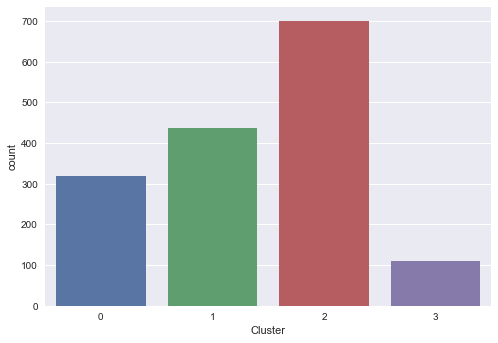

In [82]:
#Visualization
sns.countplot(x='Cluster', data=df_with_clusters)

# Saving the kmeans clustering model and the data with cluster label

In [83]:
from joblib import dump

# Save the KMeans model to a file
model_filename = 'CA_kmeans_model.joblib'
dump(kmeans, model_filename)

['CA_kmeans_model.joblib']

In [84]:
# Specify the CSV file name
csv_filename = 'Clustered_CustomerAnalysis_Data.csv'

# Save the DataFrame to a CSV file
df_with_clusters.to_csv(csv_filename, index=False)

# Importing test data 

In [86]:
scaled_df_test = pd.read_csv('preprocessed_test_data.csv')

# Classification

In [109]:
x = scaled_df_train.iloc[:, :-1]
y = scaled_df_train.iloc[:, -1]

In [110]:
scaled_df_train.shape

(1568, 27)

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Evaluate RandomeForestRegressor

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a RandomForestRegressor
rclf = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=0)

# Fit the regressor to your training data
rclf.fit(x_train, y_train)

# Make predictions
y_pred = rclf.predict(x_test)

# Calculate a regression metric, e.g., Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0972203821656051


# SVM

In [113]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create a SVR model
model = SVR(kernel='linear', C=1)

# Fit the SVR model to your training data
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate a regression metric, e.g., Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.13746733983271966


In [114]:
x1 = scaled_df_test.iloc[:, :-1]
y1 = scaled_df_test.iloc[:, -1]

In [115]:
scaled_df_test.shape

(550, 26)

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [117]:
# Create a RandomForestRegressor
rclf = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=0)

# Fit the regressor to your training data
rclf.fit(x_train, y_train)

# Make predictions
y_pred = rclf.predict(x_test)

# Calculate a regression metric, e.g., Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8966812305890042


In [118]:
# Create a SVR model
model = SVR(kernel='linear', C=1)

# Fit the SVR model to your training data
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate a regression metric, e.g., Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8348410292126286


# Evaluation

In [119]:
train_data = scaled_df_train
test_data = scaled_df_test

In [120]:
# Define your feature columns and target column for training data
X_train = train_data.drop('Cluster', axis=1)  # Features for training data (all columns except 'Cluster')
y_train = train_data['Cluster']  # Target for test data (only 'Cluster' column)

In [121]:
X = X_train
y = y_train

In [122]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [123]:
#Decision_Tree
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [124]:
#Confusion_Matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 83  13   2   0]
 [  9 102  17   0]
 [  1   8 195   0]
 [  1   2   0  38]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        98
           1       0.82      0.80      0.81       128
           2       0.91      0.96      0.93       204
           3       1.00      0.93      0.96        41

    accuracy                           0.89       471
   macro avg       0.90      0.88      0.89       471
weighted avg       0.89      0.89      0.89       471



# Predicting new data

In [125]:
new_data = pd.read_csv('preprocessed_test_data.csv')
new_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign,Customer_Age,customer_tenure
0,-0.588057,-1.456106,-0.438892,1.137789,0.902612,1.184139,-0.781338,-0.556111,-0.619806,-0.577002,...,-0.107429,-0.283813,-0.287536,-0.305679,-0.272431,-0.136083,-0.085592,-0.436436,-0.193284,-1.372737
1,1.396184,0.976265,-0.901306,1.137789,0.902612,-0.405858,-0.829590,-0.679532,-0.697688,-0.701719,...,-0.107429,-0.283813,-0.287536,-0.305679,-0.272431,-0.136083,-0.085592,-0.436436,1.156638,1.498005
2,1.396184,0.976265,-0.872343,1.137789,-0.992184,0.112620,-0.892921,-0.679532,-0.727975,-0.701719,...,-0.957584,-0.283813,-0.287536,-0.305679,-0.272431,-0.136083,-0.085592,-0.436436,-1.205726,-1.372737
3,-0.588057,0.976265,-0.109115,-0.817786,0.902612,1.322400,-0.292789,-0.506743,-0.563558,-0.648269,...,-0.107429,-0.283813,-0.287536,-0.305679,-0.272431,-0.136083,-0.085592,-0.436436,1.409748,0.062634
4,-0.588057,0.976265,-0.320944,1.137789,0.902612,1.702617,-0.838637,-0.679532,-0.706341,-0.701719,...,-0.107429,-0.283813,-0.287536,-0.305679,-0.272431,-0.136083,-0.085592,-0.436436,-0.024544,-1.372737


In [126]:
new_data1 = new_data.values

In [127]:
model.predict(new_data1)


array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 3, 2, 0, 1, 2, 2,
       1, 2, 2, 3, 2, 1, 2, 3, 3, 2, 3, 2, 1, 0, 2, 2, 1, 2, 3, 3, 3, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 1, 0, 2,
       1, 0, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       3, 2, 1, 2, 1, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 0,
       0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2,
       0, 1, 1, 1, 2, 3, 2, 0, 1, 3, 2, 2, 1, 2, 3, 2, 0, 0, 0, 1, 2, 2,
       0, 1, 1, 2, 1, 0, 3, 1, 2, 2, 1, 3, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1,
       0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 3, 2, 1, 0, 1, 2, 3, 2, 1, 2, 2,
       1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 3, 3,
       0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 3, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 1, 0,
       0, 3, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 3, 2, 1,

In [128]:
new_data['Predicted_class'] = model.predict(new_data1)
new_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last_Campaign,Customer_Age,customer_tenure,Predicted_class
0,-0.588057,-1.456106,-0.438892,1.137789,0.902612,1.184139,-0.781338,-0.556111,-0.619806,-0.577002,...,-0.283813,-0.287536,-0.305679,-0.272431,-0.136083,-0.085592,-0.436436,-0.193284,-1.372737,2
1,1.396184,0.976265,-0.901306,1.137789,0.902612,-0.405858,-0.829590,-0.679532,-0.697688,-0.701719,...,-0.283813,-0.287536,-0.305679,-0.272431,-0.136083,-0.085592,-0.436436,1.156638,1.498005,2
2,1.396184,0.976265,-0.872343,1.137789,-0.992184,0.112620,-0.892921,-0.679532,-0.727975,-0.701719,...,-0.283813,-0.287536,-0.305679,-0.272431,-0.136083,-0.085592,-0.436436,-1.205726,-1.372737,2
3,-0.588057,0.976265,-0.109115,-0.817786,0.902612,1.322400,-0.292789,-0.506743,-0.563558,-0.648269,...,-0.283813,-0.287536,-0.305679,-0.272431,-0.136083,-0.085592,-0.436436,1.409748,0.062634,1
4,-0.588057,0.976265,-0.320944,1.137789,0.902612,1.702617,-0.838637,-0.679532,-0.706341,-0.701719,...,-0.283813,-0.287536,-0.305679,-0.272431,-0.136083,-0.085592,-0.436436,-0.024544,-1.372737,2


In [129]:
from sklearn.manifold import TSNE

tsne1 = TSNE(n_components=2, perplexity=35, n_iter=300, random_state=42)
new_data_tsne = tsne.fit_transform(new_data)
    
new_data_tsne

array([[-3.8162856,  2.198321 ],
       [-3.3712304,  4.4126267],
       [-9.314465 , 11.116548 ],
       ...,
       [-2.4032676, -7.5487113],
       [ 5.7465134, -1.5474844],
       [ 2.7540352, 11.238689 ]], dtype=float32)

In [130]:
new_data_tsne = pd.DataFrame(data=new_data_tsne, columns=['component 1', 'component 2'])
new_data_tsne.head()

,component 1,component 2
0,-3.816286,2.198321
1,-3.371230,4.412627
2,-9.314465,11.116548
3,2.315326,1.194821
4,-6.261334,3.126654


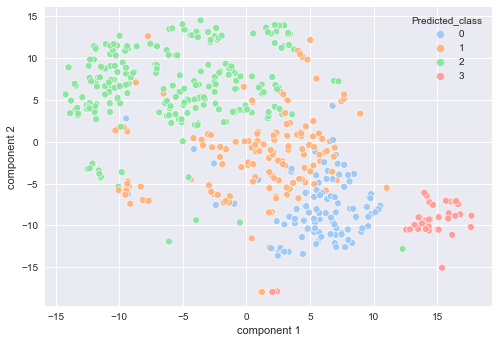

In [131]:
sns.scatterplot(x=new_data_tsne['component 1'], 
                y=new_data_tsne['component 2'], 
                hue=new_data['Predicted_class'],
               palette='pastel')
plt.show()